In [165]:
import numpy as np
import pandas as pd  # pip install pandas 
import talib 
import tensorflow
import keras

In [166]:
import random
random.seed(1234)

In [167]:
dataset = pd.read_csv('C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\DATEN IBM\\ohlc_jan18_feb18.csv')
dataset = dataset.dropna()
dataset = dataset[['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]
dataset = dataset[20:30] # ab 01.02.2018 bis 12.02.2018 -- Zeilen 21:31 -- Training: [20:27] , Test: [27:30]
dataset

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
20,163.74,164.98,162.80,163.74
21,163.20,164.13,161.94,162.43
22,161.34,161.79,158.87,158.94
23,158.10,158.37,150.00,152.55
24,150.52,155.48,149.25,155.31
25,154.16,155.28,153.43,153.95
26,152.32,153.16,147.50,147.54
27,148.84,150.54,144.41,149.51
28,150.81,152.39,150.30,151.41
29,150.90,151.15,149.65,150.79


In [168]:
#fh=open("C:\\Users\\Büsra\\Desktop\\KNN_Log_Returns_output.txt",'w')
#print(dataset,file=fh)
#fh.close()

In [169]:
dataset['H-L'] = dataset['<HIGH>'] - dataset['<LOW>']
dataset['O-C'] = dataset['<CLOSE>'] - dataset['<OPEN>']
dataset['Log Renditen'] = np.log(dataset['<CLOSE>']/dataset['<CLOSE>'].shift(1))
dataset['Log Renditen(t+1)']=dataset['Log Renditen'].shift(-1)

In [170]:
dataset = dataset.dropna()
dataset = dataset.dropna(thresh=2)
dataset.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,H-L,O-C,Log Renditen,Log Renditen(t+1)
21,163.20,164.13,161.94,162.43,2.19,-0.77,-0.008033,-0.021720
22,161.34,161.79,158.87,158.94,2.92,-2.40,-0.021720,-0.041034
23,158.10,158.37,150.00,152.55,8.37,-5.55,-0.041034,0.017931
24,150.52,155.48,149.25,155.31,6.23,4.79,0.017931,-0.008795
25,154.16,155.28,153.43,153.95,1.85,-0.21,-0.008795,-0.042529


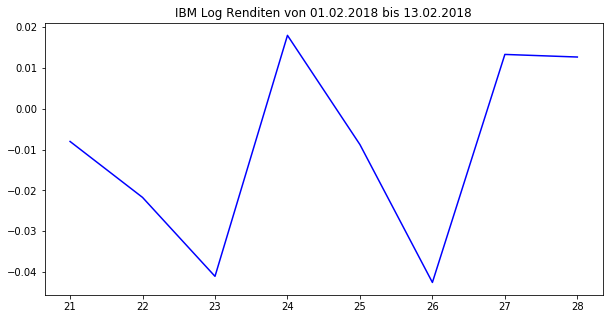

In [171]:
from matplotlib import pyplot
%matplotlib inline
datz = dataset['Log Renditen']
#datz.head()
pyplot.figure(figsize=(10,5))
pyplot.plot(datz, color='b')
pyplot.title('IBM Log Renditen von 01.02.2018 bis 13.02.2018')
pyplot.show()

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X= scaler.fit_transform(dataset[['<CLOSE>', 'H-L','O-C']])
y= scaler.fit_transform(dataset[['Log Renditen(t+1)']])

In [173]:
# ab 01.02.18 als training  --- 6 Tage
# 12.02 und 13.02 vorhersagen --- da t+1
X_train = X[:6]
X_test = X[6:]
y_train = y[:6]
y_test = y[6:]

In [174]:
#X_test

In [175]:
print(len(X_train), len(X_test))
print(len(y_train),len(y_test))

6 2
6 2


In [176]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6, 1, 3) (6, 1) (2, 1, 3) (2, 1)


In [177]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [178]:
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(Dense(1))
lstm.compile(loss= 'mean_squared_error', optimizer='adam')

history = lstm.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 6 samples, validate on 2 samples
Epoch 1/50
 - 1s - loss: 0.3640 - val_loss: 0.6069
Epoch 2/50
 - 0s - loss: 0.3567 - val_loss: 0.5959
Epoch 3/50
 - 0s - loss: 0.3495 - val_loss: 0.5849
Epoch 4/50
 - 0s - loss: 0.3423 - val_loss: 0.5740
Epoch 5/50
 - 0s - loss: 0.3353 - val_loss: 0.5632
Epoch 6/50
 - 0s - loss: 0.3284 - val_loss: 0.5525
Epoch 7/50
 - 0s - loss: 0.3216 - val_loss: 0.5419
Epoch 8/50
 - 0s - loss: 0.3150 - val_loss: 0.5314
Epoch 9/50
 - 0s - loss: 0.3084 - val_loss: 0.5209
Epoch 10/50
 - 0s - loss: 0.3019 - val_loss: 0.5106
Epoch 11/50
 - 0s - loss: 0.2956 - val_loss: 0.5004
Epoch 12/50
 - 0s - loss: 0.2894 - val_loss: 0.4903
Epoch 13/50
 - 0s - loss: 0.2833 - val_loss: 0.4803
Epoch 14/50
 - 0s - loss: 0.2773 - val_loss: 0.4704
Epoch 15/50
 - 0s - loss: 0.2714 - val_loss: 0.4606
Epoch 16/50
 - 0s - loss: 0.2656 - val_loss: 0.4508
Epoch 17/50
 - 0s - loss: 0.2599 - val_loss: 0.4412
Epoch 18/50
 - 0s - loss: 0.2543 - val_loss: 0.4317
Epoch 19/50
 - 0s - loss: 0.248

In [179]:
lstm.input_shape

(None, 1, 3)

In [180]:
lstm.output_shape

(None, 1)

In [181]:
lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                17408     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________


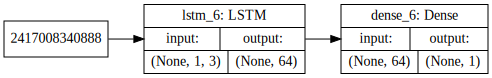

In [182]:
# Print Neural Net Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(lstm, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))

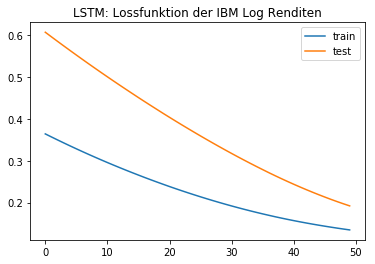

In [183]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title('LSTM: Lossfunktion der IBM Log Renditen')
pyplot.legend()
pyplot.show()

In [184]:
y_pre = lstm.predict(X_test)

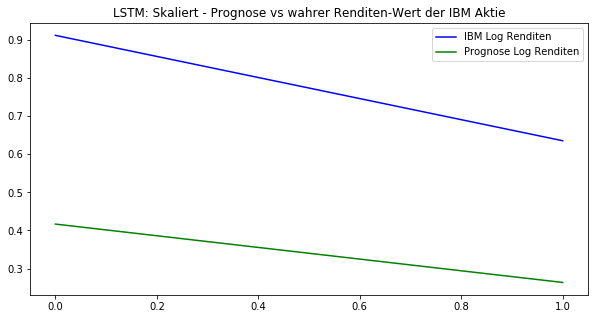

In [185]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test, color='b', label='IBM Log Renditen')
plt.plot(y_pre , color='g', label='Prognose Log Renditen')
plt.title('LSTM: Skaliert - Prognose vs wahrer Renditen-Wert der IBM Aktie')
plt.legend()
plt.show()

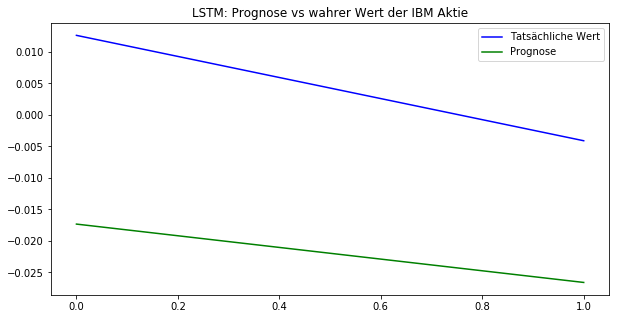

In [186]:
yhat = lstm.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

from numpy import concatenate
# inverse Skalierung - Prognose
inv_yhat = concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# inverse Skalierung - Echte Daten
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

plt.figure(figsize=(10,5))
plt.plot(inv_y, color='b', label='Tatsächliche Wert')
plt.plot(inv_yhat, color='g', label='Prognose')
plt.title('LSTM: Prognose vs wahrer Wert der IBM Aktie')
plt.legend()
plt.show()

In [187]:
# Skalierte RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pre)
print('Test MSE: %.4f' % mse)

rmse = sqrt(mean_squared_error(y_test, y_pre))
print('Test RMSE: %.4f' % rmse)

Test MSE: 0.1920
Test RMSE: 0.4382


In [188]:
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(inv_y, inv_yhat)
print('Test MSE: %.4f' % mse)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.4f' % rmse)

Test MSE: 0.0007
Test RMSE: 0.0265


In [190]:
KP_lstm_logReturn_skaliert=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Kurzzeit Output\\KP_LSTM_LogReturn_skaliert.txt",'w')
print(y_test,file=KP_lstm_logReturn_skaliert)
KP_lstm_logReturn_skaliert.close()

In [191]:
KP_lstm_logReturn=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Kurzzeit Output\\KP_LSTM_LogReturn.txt",'w')
print(inv_y,file=KP_lstm_logReturn)
KP_lstm_logReturn.close()

In [192]:
KP_lstm_output_logReturn_skaliert=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Kurzzeit Output\\KP_LSTM_LogReturn_skaliert_output.txt",'w')
print(y_pre,file=KP_lstm_output_logReturn_skaliert)
KP_lstm_output_logReturn_skaliert.close()

In [193]:
KP_lstm_output_logReturn=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Kurzzeit Output\\KP_LSTM_LogReturn_output.txt",'w')
print(inv_yhat,file=KP_lstm_output_logReturn)
KP_lstm_output_logReturn.close()